In [197]:
# We import libraries 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense, Normalization
import seaborn as sns

In [198]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data' 
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model_year', 'origin']

data = pd.read_csv(url, names=column_names,                     # names for coloumns name
                    na_values='?', comment='\t',                # na_values='?' means treat ? as null values # comment means to exclude any empty space 
                    sep=' ', skipinitialspace=True)             # sep means that it should be seperated by space 
                                                                # The skipinitialspace=True allow coment to skip empty spaces 


In [199]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [200]:
data = data.drop('origin', axis=1)   #since the origin may not affect the fuel consumption i dropped it

In [201]:
data.describe().transpose()[['mean', 'std']]

,mean,std
mpg,23.514573,7.815984
cylinders,5.454774,1.701004
displacement,193.425879,104.269838
horsepower,104.469388,38.491160
weight,2970.424623,846.841774
acceleration,15.568090,2.757689
model_year,76.010050,3.697627


In [202]:
data.isna().sum()  #checking for null characters 

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
dtype: int64

In [203]:
data = data.dropna()   # Always run this evendo you dont have any nan in your data it helps to make sure that your loss does not return nan during training


In [204]:
data.info()   # I check for hidden information like null characters

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 24.5 KB


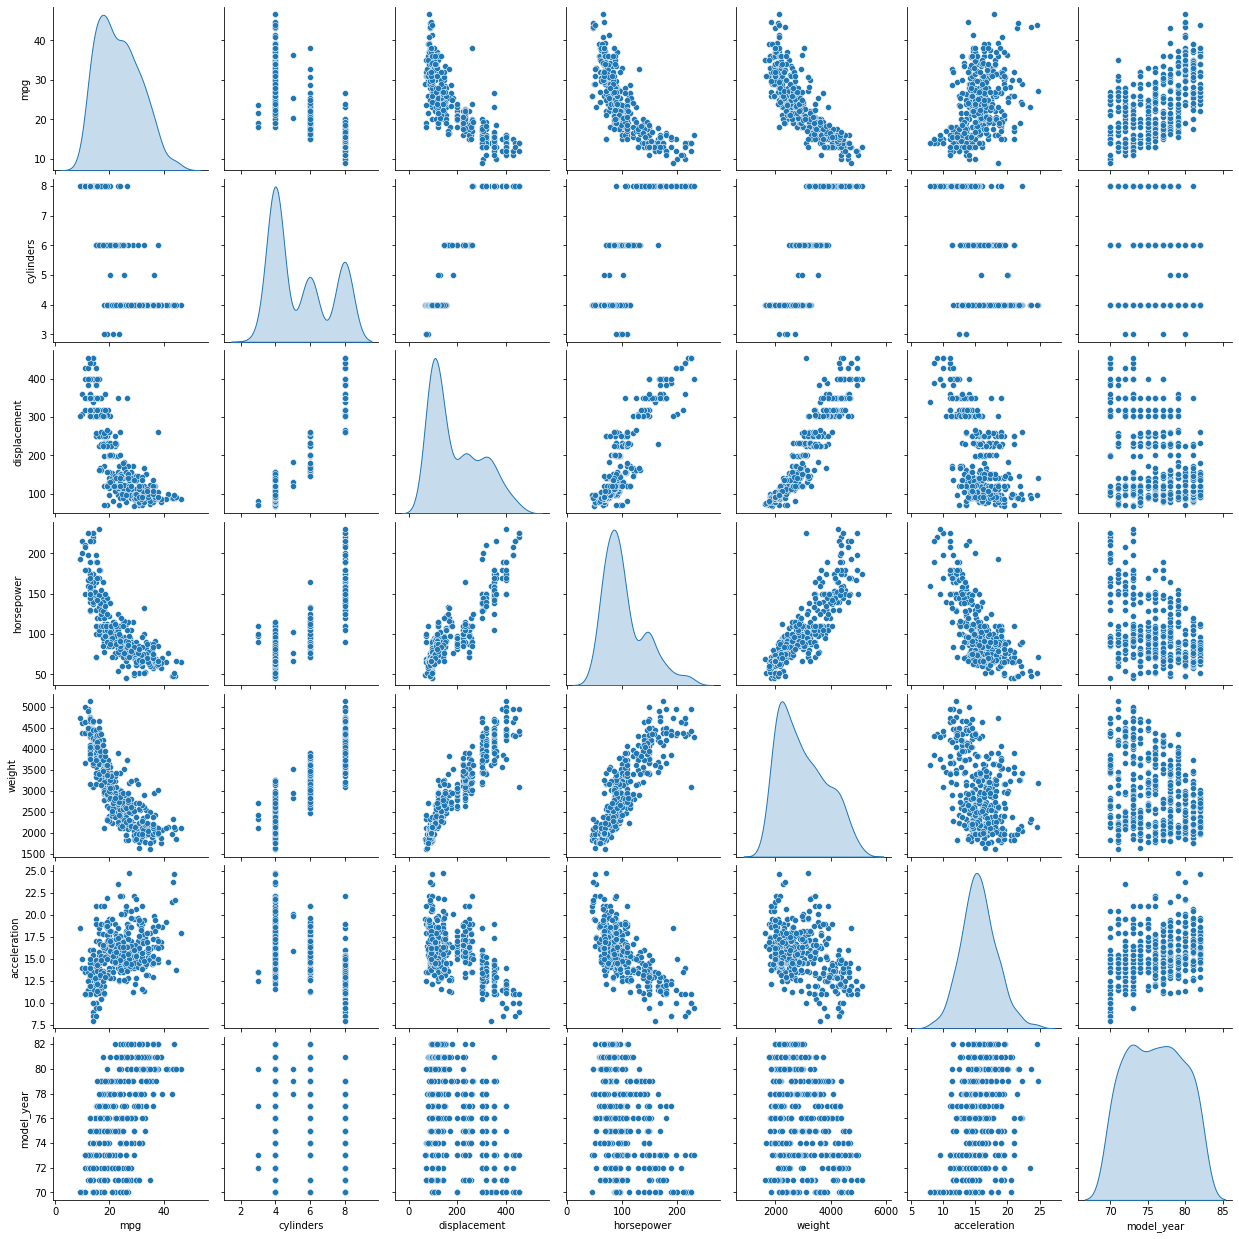

In [205]:

sns.pairplot(data, diag_kind='kde')   # I check how this data relates to each other



In [206]:
from sklearn.model_selection import train_test_split     #Importing train test split for data spliting 

In [207]:
X = data.drop('mpg', axis=1).values     # Since mpg is the y_label i drop it
y = data['mpg'].values

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # Here we use 80% for training and 2% for testing 

In [209]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler  #This is use for scaling the data

In [210]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [211]:
y_train

array([18.6, 25. , 18. , 15. , 39. , 15.5, 29.8, 25. , 21.5, 17. , 16. ,
       22.3, 30.7, 30. , 31. , 19.2, 16.5, 18. , 13. , 27.5, 18. , 11. ,
       17. , 14. , 26. , 34.2, 34.4, 35.1, 20. , 22. , 18.2, 32. , 31.9,
       21. , 22. , 37.2, 32.9, 19.4, 15. , 22. , 21. , 37. , 21. , 15. ,
       31. , 23. , 24.5, 29. , 30.5, 15. , 34.7, 27. , 28. , 19. , 41.5,
       17.5, 29. , 26. , 31.8, 18. , 16.5, 13. , 19. , 30. , 20. , 19. ,
       27. , 23. , 14. , 20.6, 27.9, 15. , 32. , 12. , 23. , 33.5, 25.5,
       40.8, 16.5, 32.3, 44.3, 12. , 32.8, 24. , 18.1, 14. , 13. , 11. ,
       18. , 32. , 27.2, 16. , 17.5, 12. , 26. , 14. , 28. , 20. , 13. ,
       27.2, 29. , 19.1, 28. , 27. , 19. , 26. , 15.5, 13. , 38. , 18. ,
       23.7, 24.5, 34. , 23. , 26. , 33. , 29.5, 15. , 24. , 32. , 14. ,
       14. , 39.1, 17.5, 17. , 21. , 33. , 25.8, 20.3, 24. , 20.2, 23.9,
       34. , 20.2, 28.1, 13. , 39.4, 14. , 16. , 18.5, 20. , 32. , 18. ,
       26.5, 16. , 16. , 29. , 10. , 15. , 46.6, 20

In [212]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import  Adam

In [213]:
# building of the model

model = Sequential()
model.add(Dense(64,  activation='relu'))   # we use two hidden two hidden layers here
#model.add(Dense(64,  activation='relu'))
model.add(Dense(32,  activation='relu'))

model.add(Dense(1))

In [214]:
model.compile(optimizer='adam', loss='mse')

In [215]:
history = model.fit(x=X_train,y=y_train, epochs=100, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
10/10 [==============================] - 1s 15ms/step - loss: 613.6792 - val_loss: 550.1334
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 585.4461 - val_loss: 523.8527
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 555.2800 - val_loss: 494.0217
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 520.4576 - val_loss: 459.1100
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 479.9366 - val_loss: 417.9524
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 431.2121 - val_loss: 368.9954
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 374.5275 - val_loss: 311.0633
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 306.7125 - val_loss: 247.6257
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 237.2959 - val_loss: 183.1619
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss

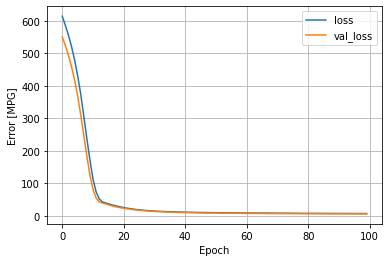

In [216]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

3/3 [==============================] - 0s 3ms/step


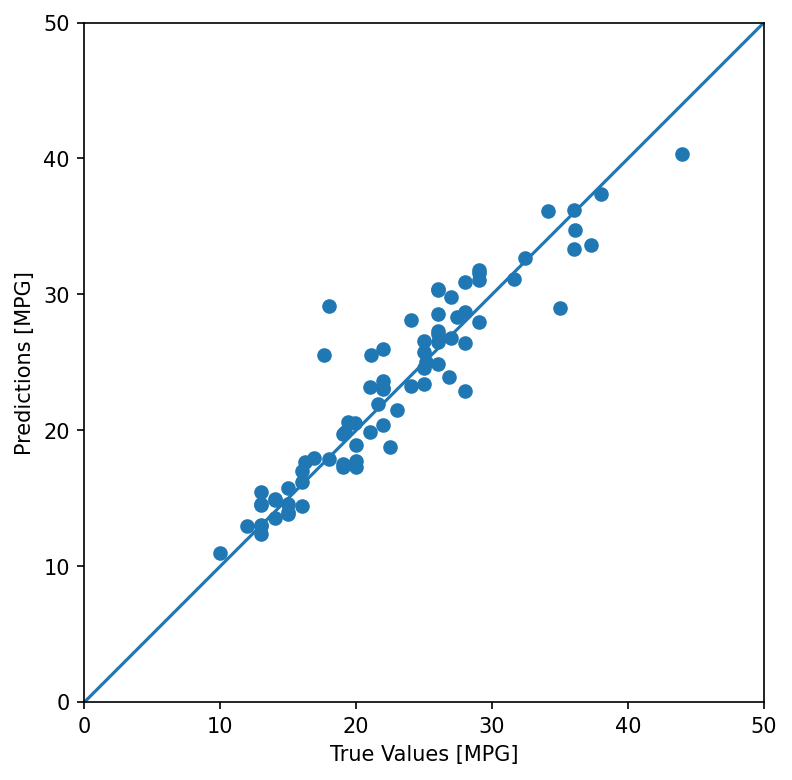

In [217]:
plt.figure(figsize=(12, 6), dpi=150)
y_pred = model.predict(X_test)
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)
